# Práctica 1 Vectorización

### Calculo de integrales mediante el metodo de Monte Carlo
Importamos las librerias que nos harán falta:
+ matplotlib para hacer gráficas <br>
+ numpy para generar números aleatorios y operaciones con arrays <br>
+ time para calcular el tiempo de cómputo <br>
+ scipy para comprobar el area de una función <br>

Para calcular el area de una funcion compleja de integrar usaremos este metodo que se basa en la probabilidad para aproximar el calculo de una integral <br>
Se usan dos metodos diferentes para calcular el numero de puntos que caen debajo de la funcion
+ Bucle, calculando 1 a 1 todos los puntos que estan debajo
+ Vectores, calculando la longitud del vecto de los elementos por debajo de la funcion <br>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import integrate

In [3]:
def f(x):
    """funcion a integrar, pasandole un array de x
    nos devuelve un array con su funcion equivalente"""
    return np.sin(x)+1
    #return (-x)**2 #puede ser cualquier funcion ej:ln(x)+3x+x^2

def plot_func(fun,a,b):
    """plots the function fun from point a to b"""
    x = np.linspace(a,b,50)
    y = fun(x)
    plt.plot(x,y)

### Funciones usadas para el calculo de puntos debajo de la funcion
La funcion loop itera sobre los n puntos y comprueba si estan por debajo de la funcion <br>
La funcion vector simplemente devuelve la longitud de el array el cual contiene los puntos que estan por debajo <br>
Para 1 millon de puntos el tiempo de calculo es de unas <b>10 veces mayor</b> en la funcion del bucle
    
+ Vector

    Media de tiempo con 1 millon de puntos es de 93ms
    
--- 
+ Loop

    Media de tiempo con 1 millon de puntos es de 953ms

In [4]:
def vector(fun,a,b,num_puntos,x_rand,y_rand): #vector method

    return len(y_rand[y_rand < fun(x_rand)])
    
def loop(fun,a,b,num_puntos,x_rand,y_rand): #loop method

    y_fun = fun(x_rand)
    debajo = 0
    for i in range(num_puntos):
        if y_rand[i] < y_fun[i]:
            debajo += 1
    return debajo

In [5]:
def integra_mc(fun, a, b, num_puntos=10000, print_out=True, method=vector):
    VAL = 10000
    x = np.linspace(a,b,VAL)
    y = np.array(fun(x))
    tic = time.process_time()
    x_rand = np.random.uniform(a,b,num_puntos)
    y_rand = np.random.uniform(min(y),max(y),num_puntos)
    debajo = method(fun,a,b,num_puntos,x_rand,y_rand)
    toc = time.process_time()
    if print_out:
        print("Tiempo: {}".format(1000*(toc-tic)))
        print("Nº Debajo: {}".format(debajo))
        print("Nº Total: {}".format(num_puntos))
        print("(b-a)M = {}".format((b-a)*max(y)))
        print("Area Vector: {}".format((debajo/num_puntos)*(b-a)*max(y)))
        plt.scatter(x_rand,y_rand,c='red',marker='x', alpha=0.5)
    return (debajo/num_puntos)*(b-a)*max(y)

### Prueba del metodo montecarlo 
Imprimiendo todos los valores obtenidos <br>


Tiempo: 0.0
Nº Debajo: 50
Nº Total: 100
(b-a)M = 19.999999807419016
Area Vector: 9.999999903709508

Area de scipy: 11.839071529076453
Error: 1.8390716253669446


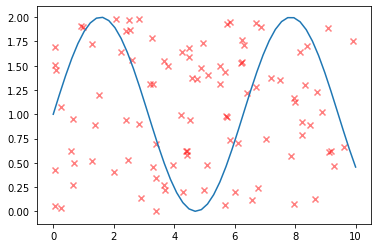

In [6]:
func = f
a = 0
b = 10
puntos = 100
plot_func(func,a,b)
mc_area = integra_mc(func,a,b,num_puntos=puntos)
print("\nArea de scipy: {}".format(integrate.quad(func,a,b)[0]))
print("Error: {}".format(abs(mc_area - integrate.quad(func,a,b)[0])))
plt.show()

In [257]:
def integra_mc_time(fun, a, b, num_puntos=10000, method=vector):
    """Devuelve una tupla de (area,tiempo)"""
    VAL = 1000
    x = np.linspace(a,b,VAL)
    y = np.array(fun(x))
    tic = time.process_time()
    x_rand = np.random.uniform(a,b,num_puntos)
    y_rand = np.random.uniform(min(y),max(y),num_puntos)
    debajo = method(fun,a,b,num_puntos,x_rand,y_rand)
    toc = time.process_time()
    return (((debajo/num_puntos)*(b-a)*max(y)),1000*(toc-tic))

def compara_tiempos(fun,a,b,puntos_min=100,puntos_max=1000000):
    sizes = np.linspace(puntos_min,puntos_max,20) #100000000
    vector_time = []
    vector_area = []
    loop_time = []
    for size in sizes:
        #Devuelven una tupla de (area,tiempo)
        v = integra_mc_time(fun,a,b,int(size),method=vector)
        vector_time.append(v[1])
        vector_area.append(v[0])
        loop_time.append(integra_mc_time(fun,a,b,int(size),method=loop)[1])
    actual_area = integrate.quad(fun,a,b)[0]
    return (sizes, loop_time, vector_time, vector_area, actual_area)

#result -> sizes, loop_time, vector_time, vector_area, actual_area
    
def plot_dif_time(result):
    plt.figure()
    plt.scatter(result[0],result[1], c='red')
    plt.plot(result[0],result[1], c='red', label='bucle')
    plt.scatter(result[0], result[2], c='blue')
    plt.plot(result[0], result[2], c='blue', label='vector')
    plt.legend()
    plt.show()
def plot_vector_time(result):
    plt.scatter(result[0], result[2], c='blue', label='vector')
    plt.plot(result[0], result[2], c='blue', label='vector')
    plt.show()    

def plot_areas(result):
    plt.scatter(result[0],result[3], c='blue', label='results vector')
    plt.plot([min(result[0]),max(result[0])],[result[4],result[4]], c='green', label='actual')
    plt.legend()
    plt.show()

In [266]:
result = compara_tiempos(f,a,b,puntos_min=100,puntos_max=1000000)

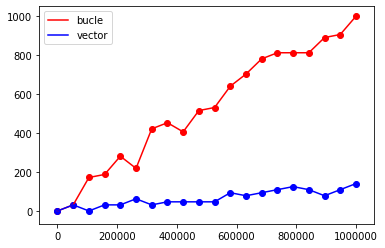

In [267]:
plot_dif_time(result)

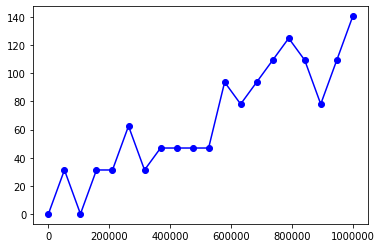

In [268]:
plot_vector_time(result)

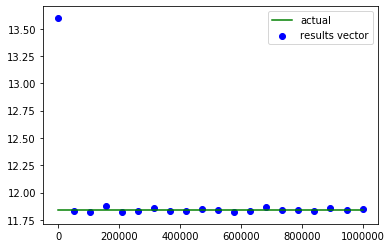

In [269]:
plot_areas(result)